In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

os.environ['TRAIN_DATA_PATH'] = "https://raw.githubusercontent.com/nee2shaji/IIITH_Sem3/master/light_train.csv"
os.environ['TEST_DATA_PATH'] = "https://raw.githubusercontent.com/nee2shaji/IIITH_Sem3/master/light_test.csv"
pd.options.display.max_columns = None
TRAIN_DATA_PATH = os.getenv("TRAIN_DATA_PATH")
TEST_DATA_PATH = os.getenv("TEST_DATA_PATH")

In [2]:
train_data = pd.read_csv(TRAIN_DATA_PATH)
train_data.head()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,att11,att12,att13,att14,att15,att16,att17,att18,att19,att20,att21,att22,att23,att24,class
0,1,1,1,1,1,0,1,1,0,1,0,0,0,0,0,1,1,1,1,0,0,1,1,0,8
1,1,1,1,1,1,1,1,1,0,1,0,0,0,1,1,1,0,0,0,1,1,1,0,0,9
2,0,1,1,0,0,1,0,1,1,1,1,1,0,0,0,1,0,0,1,1,1,1,0,1,7
3,1,1,0,1,1,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,1,1,1,1,6
4,1,1,1,0,1,1,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1,1,1,1,0


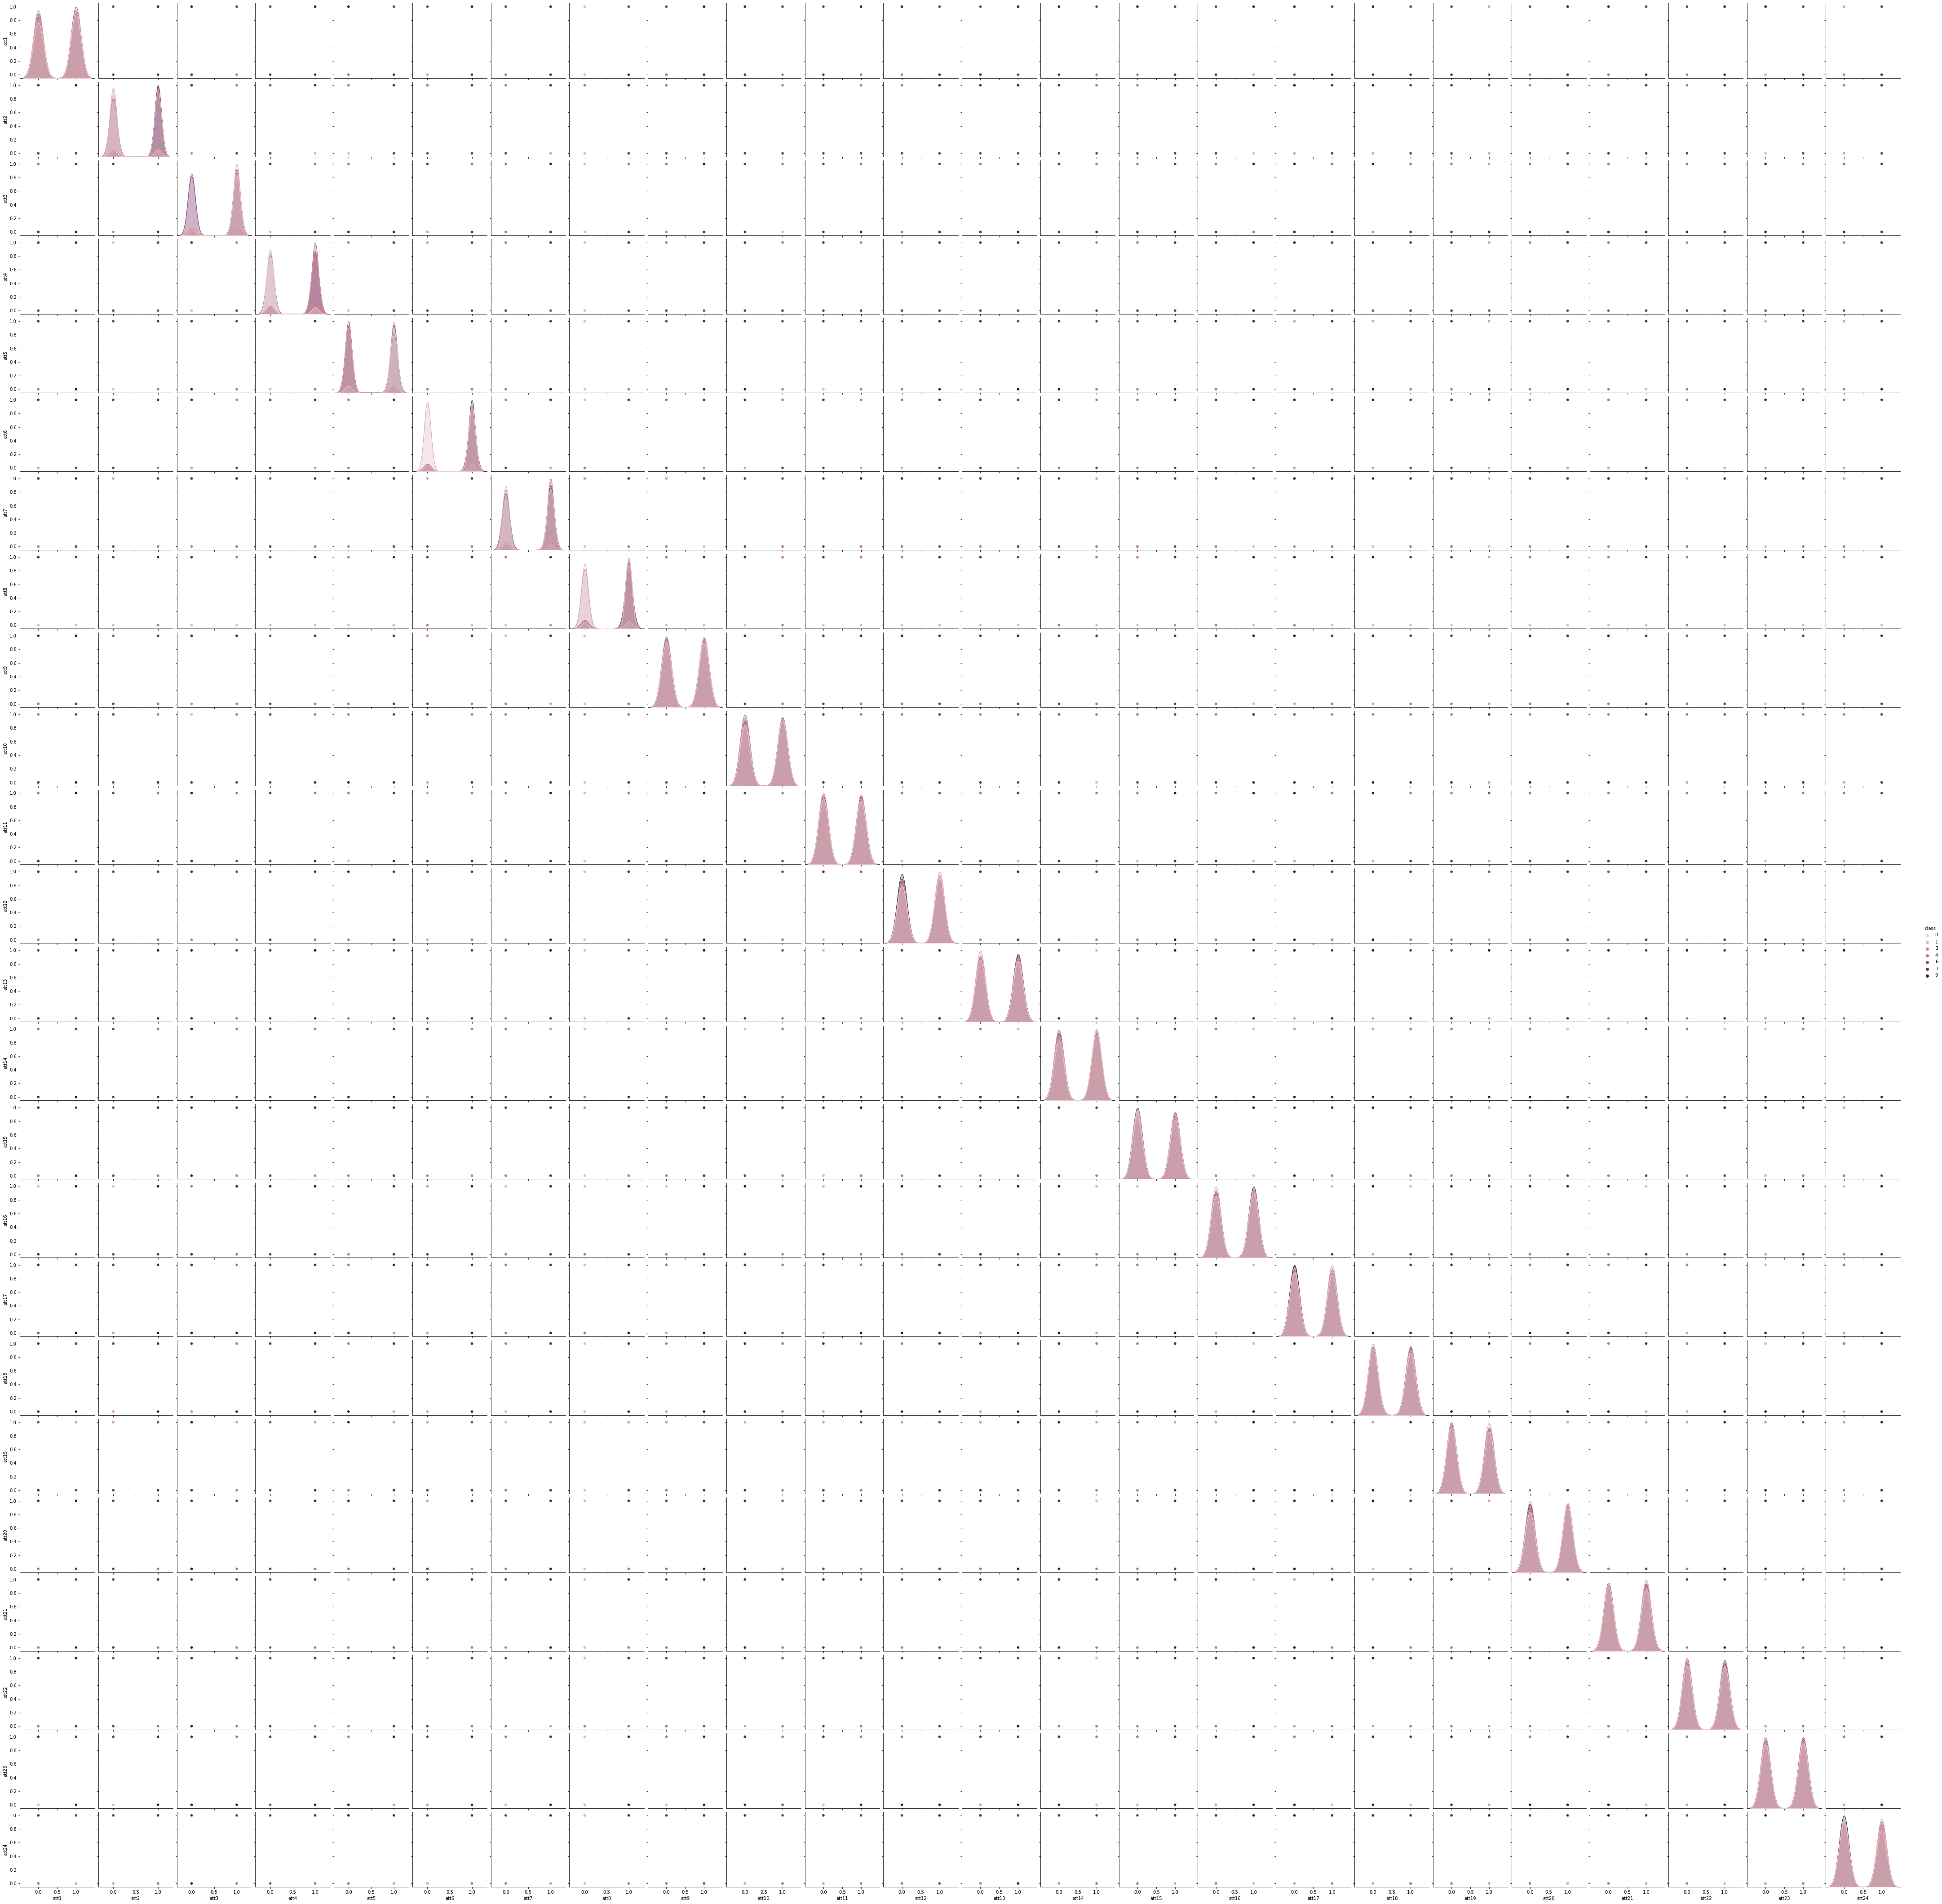

In [3]:
train_data = pd.read_csv(TRAIN_DATA_PATH)

neg_data = train_data[train_data['class'] == 0]
pos_data = train_data[train_data['class'] == 1]

sns.pairplot(train_data, hue='class')

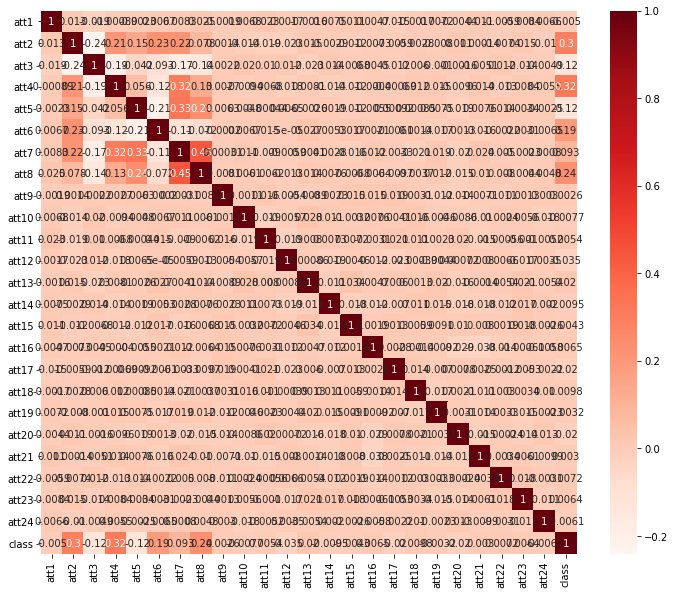

In [4]:
train_data = pd.read_csv(TRAIN_DATA_PATH)

plt.figure(figsize=(12,10))
cor = train_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn import model_selection

train_data = pd.read_csv(TRAIN_DATA_PATH)
Target = ['class']
data1_x_bin = ['att1', 'att2', 'att3', 'att4', 'att5', 'att6', 'att7', 'att8', 'att9',
       'att10', 'att11', 'att12', 'att13', 'att14', 'att15', 'att16', 'att17',
       'att18', 'att19', 'att20', 'att21', 'att22', 'att23', 'att24']

#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
  
    ]



#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = train_data[Target]

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, train_data[data1_x_bin], train_data[Target], cv  = cv_split, return_train_score=True)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(train_data[data1_x_bin], train_data[Target])
    MLA_predict[MLA_name] = alg.predict(train_data[data1_x_bin])
    
    row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
MLA_compare

In [ ]:

import os
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# Train and test data paths will be available as env variables during evaluation
TRAIN_DATA_PATH = os.getenv("TRAIN_DATA_PATH")
TEST_DATA_PATH = os.getenv("TEST_DATA_PATH")

# Prepare the training data
train_data = pd.read_csv(TRAIN_DATA_PATH)
X_train, y_train = train_data.iloc[:,:-1], train_data.iloc[:,-1]

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)

test_data = pd.read_csv(TEST_DATA_PATH)
X_test_scaled = sc.transform(test_data)



In [ ]:
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }


clf = GridSearchCV(GradientBoostingClassifier(), parameters, scoring="f1_micro", n_jobs=-1)

clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.best_params_)

In [ ]:
param_grid = { 
    'n_estimators': [200, 500, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
rfc=RandomForestClassifier(random_state=42)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, scoring='f1_micro')
CV_rfc.fit(X_train_scaled, y_train)
print(CV_rfc.best_params_, CV_rfc.score(X_train_scaled, y_train))

In [ ]:
parameters = {'kernel':['linear'], 'C':[0.0001, 0.001, 0.01, 0.1, 1, 10]}
svc = SVC()
clfsvc = GridSearchCV(estimator = svc, param_grid = parameters, scoring='f1_micro')
clfsvc.fit(X_train_scaled, y_train)
print(clfsvc.best_params_, clfsvc.score(X_train_scaled, y_train))


In [ ]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(estimator = logreg,param_grid = grid,cv=10, scoring='f1_micro')
logreg_cv.fit(X_train_scaled,y_train)
print(logreg_cv.best_params_, logreg_cv.score(X_train_scaled, y_train))

In [ ]:
logreg=LogisticRegression(C=1.0, penalty='l2')
svc = LinearSVC(C=0.1)
rfc = RandomForestClassifier(criterion='entropy', max_depth=6, max_features='auto', n_estimators=500)
gbc = GradientBoostingClassifier()
lda = LinearDiscriminantAnalysis()

clf = VotingClassifier(estimators=[('rfc', rfc), ('lr', logreg),
('svc', svc), ('lda',lda),('gbc',gbc)], voting='soft')

clf = clf.fit(X_train_scaled, y_train)

clf.predict(X_test_scaled)

In [ ]:
submission = pd.DataFrame()
submission['clf'] = clf.predict(X_test_scaled)

# Export the prediction as submission.csv
submission.to_csv('submission.csv', header=['class'], index=False) 
submission